# Heart Disease Prediction Model using Decision Tree 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [5]:
df=pd.read_csv('heartd.csv')

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

<Axes: >

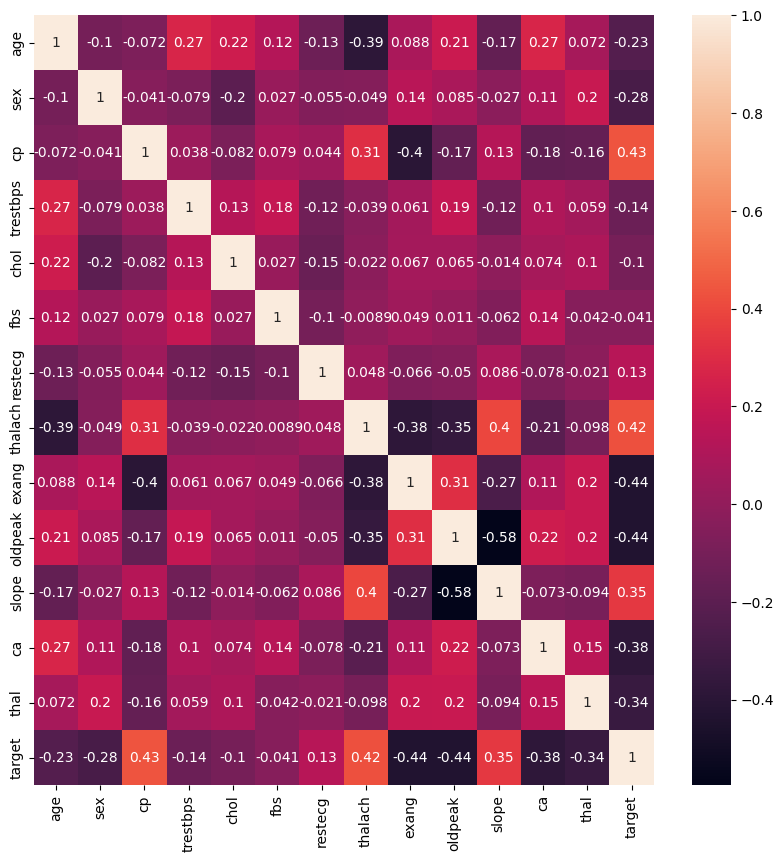

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
input_col=['slope','thalach','trestbps','restecg', 'cp']
x=df[input_col]
target=df.target

In [23]:
def get_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test, y_test)

In [25]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=10)

In [59]:
tree=DecisionTreeClassifier(max_depth=14)

In [60]:
scores=[]
for train_index,test_index in kf.split(x,target):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index] , target[train_index] , target[test_index]
    scores.append(get_score(tree, x_train, y_train, x_test, y_test))

In [61]:
scores

[1.0,
 1.0,
 1.0,
 0.9902912621359223,
 1.0,
 1.0,
 0.9901960784313726,
 0.9803921568627451,
 0.9607843137254902,
 1.0]

In [62]:
tree2=DecisionTreeClassifier()
tree2.fit(x,target)

DecisionTreeClassifier()

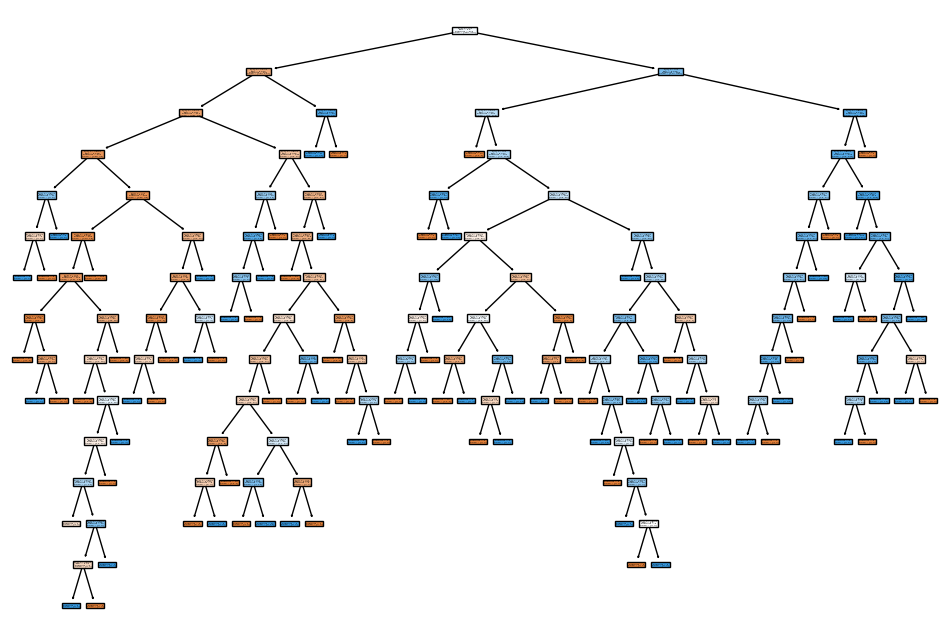

<Figure size 640x480 with 0 Axes>

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(tree,filled=True)
plt.show()
plt.savefig('decision_tree.jpg', format='jpg')